#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/Covid'


# Set Path

In [ ]:
import os

train_path = os.path.join(data_path, 'Train')
test_path = os.path.join(data_path, 'Test')
excel_file = os.path.join(data_path, 'Template_Jawaban_Penyisihan.xlsx')
normal_path = os.path.join(train_path, 'NORMAL')
covid_path  = os.path.join(train_path, 'COVID')

In [ ]:
print("Daftar file di folder NORMAL:")
print(os.listdir(normal_path))
print("\nDaftar file di folder COVID:")
print(os.listdir(covid_path))
print("\nDaftar file di folder Test:")
print(os.listdir(test_path))

Daftar file di folder NORMAL:
['NORMAL_993.png', 'NORMAL_989.png', 'NORMAL_996.png', 'NORMAL_970.png', 'NORMAL_997.png', 'NORMAL_999.png', 'NORMAL_99.png', 'NORMAL_963.png', 'NORMAL_985.png', 'NORMAL_961.png', 'NORMAL_990.png', 'NORMAL_971.png', 'NORMAL_986.png', 'NORMAL_983.png', 'NORMAL_972.png', 'NORMAL_991.png', 'NORMAL_965.png', 'NORMAL_980.png', 'NORMAL_977.png', 'NORMAL_960.png', 'NORMAL_992.png', 'NORMAL_927.png', 'NORMAL_967.png', 'NORMAL_998.png', 'NORMAL_981.png', 'NORMAL_978.png', 'NORMAL_964.png', 'NORMAL_929.png', 'NORMAL_979.png', 'NORMAL_949.png', 'NORMAL_956.png', 'NORMAL_995.png', 'NORMAL_937.png', 'NORMAL_93.png', 'NORMAL_969.png', 'NORMAL_953.png', 'NORMAL_955.png', 'NORMAL_932.png', 'NORMAL_982.png', 'NORMAL_952.png', 'NORMAL_950.png', 'NORMAL_98.png', 'NORMAL_957.png', 'NORMAL_947.png', 'NORMAL_938.png', 'NORMAL_928.png', 'NORMAL_97.png', 'NORMAL_966.png', 'NORMAL_984.png', 'NORMAL_973.png', 'NORMAL_954.png', 'NORMAL_939.png', 'NORMAL_943.png', 'NORMAL_958.png', '

In [ ]:
df_template = pd.read_excel(excel_file)
print("\nIsi file Template Jawaban Penyisihan:")
print(df_template.head())


Isi file Template Jawaban Penyisihan:
     ID Gambar  Label Kelas
0  TXT0001.png          NaN
1  TXT0002.png          NaN
2  TXT0003.png          NaN
3  TXT0004.png          NaN
4  TXT0005.png          NaN


#Preprocessing

In [ ]:
train_normal_names = os.listdir(normal_path)
train_covid_names  = os.listdir(covid_path)

['/content/drive/MyDrive/Covid/Train/COVID/COVID_98.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_990.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_981.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_958.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_959.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_982.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_986.png', '/content/drive/MyDrive/Covid/Train/COVID/COVID_991.png']
['/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_993.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_989.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_996.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_970.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_997.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_999.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_99.png', '/content/drive/MyDrive/Covid/Train/NORMAL/NORMAL_963.png']


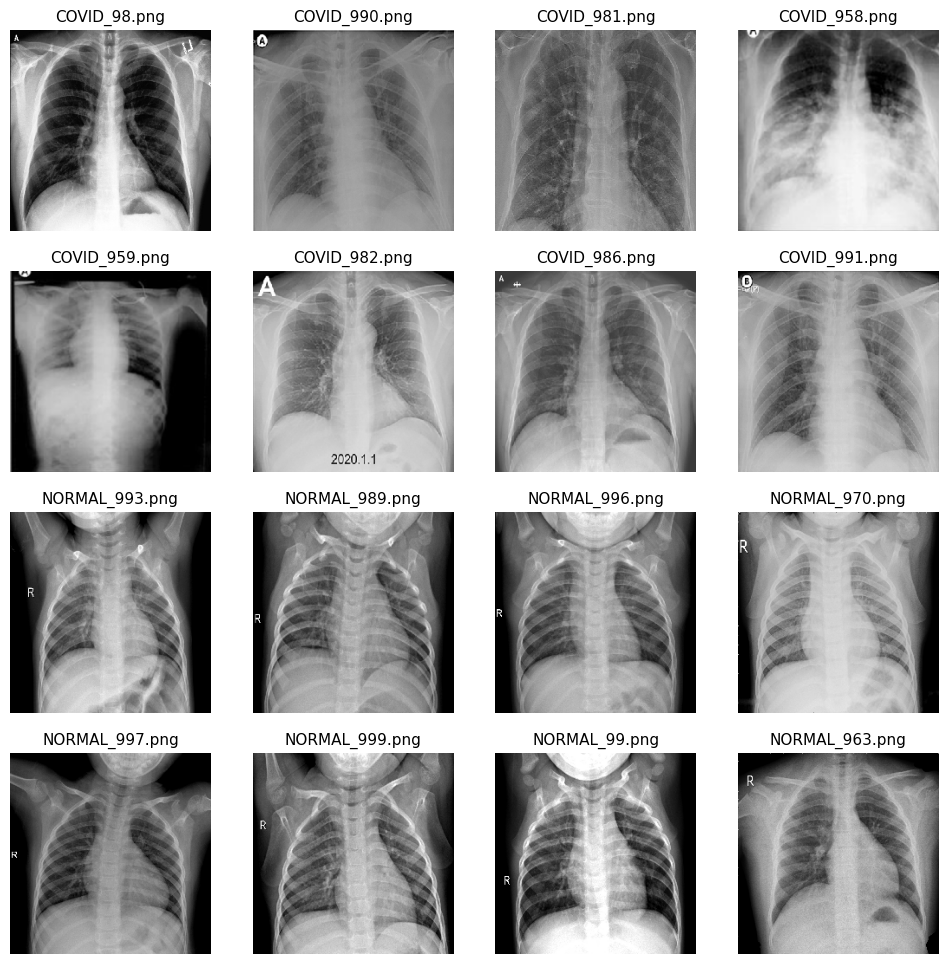

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12, 12)

covid_img = [os.path.join(covid_path, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(normal_path, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):

    title = os.path.basename(img_path)
    plot = plt.subplot(rows, columns, i+1)
    plot.axis("off")
    img = mpimg.imread(img_path)
    plot.set_title(title, fontsize=11)
    plt.imshow(img, cmap="gray")

plt.show()

In [ ]:
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

dgen_validation = ImageDataGenerator(rescale=1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    subset='training',
    batch_size=32,
    class_mode='binary'
)

validation_generator = dgen_train.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    subset='validation',
    batch_size=32,
    class_mode='binary'
)

test_filenames = os.listdir(test_path)

test_df = pd.DataFrame({'filename': test_filenames})

test_generator = dgen_test.flow_from_dataframe(
    dataframe=test_df,
    directory=test_path,
    x_col='filename',
    y_col=None,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 validated image filenames.


In [ ]:
print("Label class: ", train_generator.class_indices)
print("shape gambar : ", train_generator.image_shape)

Label class:  {'COVID': 0, 'NORMAL': 1}
shape gambar :  (150, 150, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Membuat model CNN dengan input_shape yang disesuaikan dengan train_generator.image_shape
model = Sequential()

# 1) LAYER KONVOLUSI - 1
model.add(Conv2D(32, (5,5), padding="same", activation="relu", input_shape=train_generator.image_shape))

# 2) LAYER POOLING - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) LAYER DROPOUT - 1
model.add(Dropout(0.5))

# 4) LAYER KONVOLUSI - 2
model.add(Conv2D(64, (5,5), padding="same", activation="relu"))

# 5) LAYER POOLING - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) LAYER DROPOUT - 2
model.add(Dropout(0.5))

# 7) LAYER FLATTENING UNTUK MENGUBAH MENJADI BENTUK 2D
model.add(Flatten())

# 8) MENAMBAHKAN LAYER DENSE
model.add(Dense(256, activation='relu'))

# 9) LAYER DROPOUT - 3
model.add(Dropout(0.5))

# 10) LAYER OUTPUT AKHIR
model.add(Dense(1, activation='sigmoid'))

# MENAMPILKAN RINGKASAN MODEL
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 728s 14s/step - accuracy: 0.6227 - loss: 2.1352 - val_accuracy: 0.9089 - val_loss: 0.3642
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9119 - loss: 0.2493 - val_accuracy: 0.9245 - val_loss: 0.2265
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9437 - loss: 0.1510 - val_accuracy: 0.9375 - val_loss: 0.1613
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9542 - loss: 0.1500 - val_accuracy: 0.9375 - val_loss: 0.1859
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9507 - loss: 0.1569 - val_accuracy: 0.9583 - val_loss: 0.1347
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.9542 - loss: 0.1233 - val_accuracy: 0.9583 - val_loss: 0.1295
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.9642 - loss: 0.1139 - val_accuracy: 0.9792 - val_loss: 0.1138
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9590 - loss: 0.1278 - val_accuracy: 0.9635 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

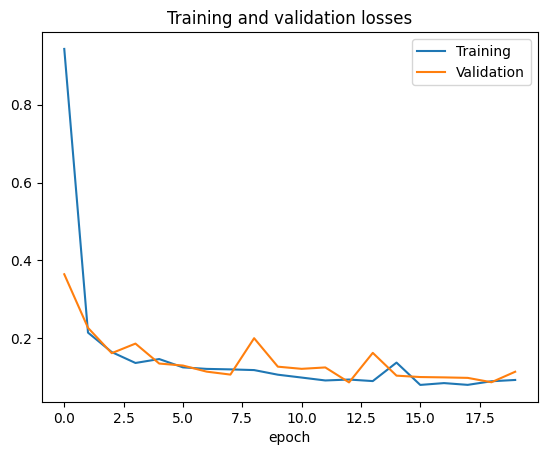

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

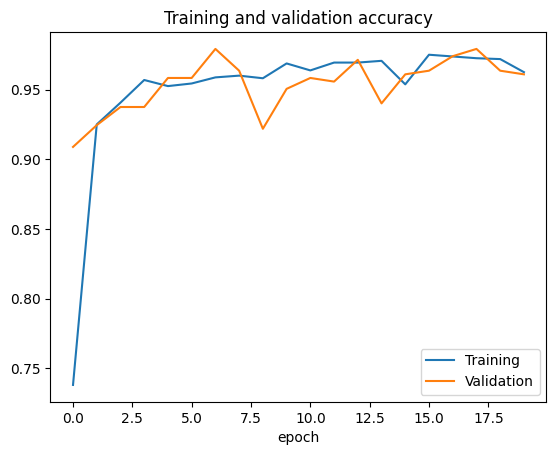

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
steps = int(np.ceil(test_generator.n / test_generator.batch_size))
predictions = model.predict(test_generator, steps=steps)


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 884ms/step


In [ ]:
import numpy as np
import pandas as pd

steps = int(np.ceil(test_generator.n / test_generator.batch_size))

predictions = model.predict(test_generator, steps=steps)

predicted_classes = ["COVID" if pred >= 0.5 else "NORMAL" for pred in predictions.flatten()]

submission = pd.read_excel(excel_file)
submission['Label Kelas'] = predicted_classes

submission.to_excel("submission_predicted.xlsx", index=False)

print("Submission file telah disimpan sebagai 'submission_predicted.xlsx'")


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 878ms/step
Submission file telah disimpan sebagai 'submission_predicted.xlsx'


In [ ]:
from google.colab import files
files.download("submission_predicted.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 968ms/step - accuracy: 0.9675 - loss: 0.1233
Validation Loss: 0.12075506895780563
Validation Accuracy: 0.9599999785423279
